In [1]:
!pip install pymupdf pdfplumber pillow tqdm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 26.8 MB/s eta 0:00:00


In [2]:
import fitz
import pdfplumber
from PIL import Image
import io, os, shutil
from tqdm import tqdm

In [3]:

if os.path.exists("extracted"):
    shutil.rmtree("extracted")
os.makedirs("extracted/images", exist_ok=True)
os.makedirs("extracted/tables", exist_ok=True)
print("Old data cleared. Fresh extraction setup complete!")

Old data cleared. Fresh extraction setup complete!


In [4]:
from google.colab import files
uploaded = files.upload()

pdf_path = list(uploaded.keys())[0]
print("Uploaded:", pdf_path)


Saving javanotes5.pdf to javanotes5.pdf
Uploaded: javanotes5.pdf


In [5]:
def extract_text(pdf_path, save_path="extracted/text.txt"):
    text_data = []
    with fitz.open(pdf_path) as doc:
        for page in tqdm(doc, desc="Extracting Text"):
            text_data.append(page.get_text("text"))
    with open(save_path, "w", encoding="utf-8") as f:
        f.write("\n".join(text_data))
    print(f" Text extracted and saved to {save_path}")
    return "\n".join(text_data)

text_content = extract_text(pdf_path)

Extracting Text: 100%|██████████| 699/699 [00:02<00:00, 341.82it/s]


 Text extracted and saved to extracted/text.txt


In [6]:
import pandas as pd

def extract_tables(pdf_path, output_dir="extracted/tables"):
    all_tables = []
    with pdfplumber.open(pdf_path) as pdf:
        for i, page in enumerate(tqdm(pdf.pages, desc="Extracting Tables")):
            tables = page.extract_tables()
            for j, table in enumerate(tables):
                df = pd.DataFrame(table[1:], columns=table[0])
                csv_path = os.path.join(output_dir, f"table_page{i+1}_{j+1}.csv")
                df.to_csv(csv_path, index=False)
                all_tables.append(df)
    print(f" Extracted {len(all_tables)} tables to {output_dir}")
    return all_tables

tables = extract_tables(pdf_path)

Extracting Tables: 100%|██████████| 699/699 [01:18<00:00,  8.89it/s]

 Extracted 58 tables to extracted/tables


In [7]:
def extract_images(pdf_path, output_dir="extracted/images"):
    image_count = 0
    with fitz.open(pdf_path) as pdf:
        for i, page in enumerate(tqdm(pdf, desc="Extracting Images")):
            for img_index, img in enumerate(page.get_images(full=True)):
                xref = img[0]
                base_image = pdf.extract_image(xref)
                image_bytes = base_image["image"]
                image_ext = base_image["ext"]
                image = Image.open(io.BytesIO(image_bytes))
                image.save(open(os.path.join(output_dir, f"page_{i+1}_img_{img_index+1}.{image_ext}"), "wb"))
                image_count += 1
    print(f" Extracted {image_count} images to {output_dir}")
    return image_count

num_images = extract_images(pdf_path)


Extracting Images: 100%|██████████| 699/699 [00:00<00:00, 1330.33it/s]

 Extracted 41 images to extracted/images


In [8]:
pdf_data = {
    "text": text_content,
    "tables": tables,
    "num_images": num_images
}

print("All extractions complete. Ready for chunking / embeddings in RAG.")


All extractions complete. Ready for chunking / embeddings in RAG.


📄 --- TEXT PREVIEW ---
Introduction to Programming Using Java
Version 5.0, December 2006
(Version 5.0.2, with minor corrections, November 2007)
David J. Eck
Hobart and William Smith Colleges

ii
c⃝1996–2007, David J. Eck
David J. Eck (eck@hws.edu)
Department of Mathematics and Computer Science
Hobart and William Smith Colleges
Geneva, NY
14456
This book can be distributed in unmodiﬁed form with no restrictions.
Modiﬁed versions can be made and distributed provided they are distributed
under the same license as the original. More speciﬁcally: This work is
licensed under the Creative Commons Attribution-Share Alike 2.5 License.
To view a copy of this license, visit http://creativecommons.org/licenses/by-
sa/2.5/ or send a letter to Creative Commons, 543 Howard Street, 5th
Floor, San Francisco, California, 94105, USA.
The web site for this book is:
http://math.hws.edu/javanotes

Contents
Preface
xiii
1
The Mental Landscape
1
1.1
Machine Language . . . . . . . . . . . . . . . . . . . . . .

00101110
11010011
01010011
00010000
10111111
10100110
11101001
00000111
10100110
00010001
00111110


--------------------------------------------------------------------------------
🔹 Table 2 (Rows: 3, Columns: 13):


None,None,None,,,None,None,None,,,None,None,None
,,None,None,,,,None,None,,,None,None
,,,None,None,,,,None,None,,,None
None,,,None,None,None,,,None,None,None,,


--------------------------------------------------------------------------------
🔹 Table 3 (Rows: 3, Columns: 1):


""
""
""
""


--------------------------------------------------------------------------------
🔹 Table 4 (Rows: 0, Columns: 2):


,


--------------------------------------------------------------------------------
🔹 Table 5 (Rows: 9, Columns: 16):


,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,


--------------------------------------------------------------------------------
🔹 Table 6 (Rows: 2, Columns: 3):


,None,None
,,
,None,None


--------------------------------------------------------------------------------
🔹 Table 7 (Rows: 2, Columns: 2):


,
,
,


--------------------------------------------------------------------------------
🔹 Table 8 (Rows: 5, Columns: 1):


(5 ) 0
0
0
0
0
""


--------------------------------------------------------------------------------
🔹 Table 9 (Rows: 4, Columns: 2):


,None
,None
,None
,
,


--------------------------------------------------------------------------------
🔹 Table 10 (Rows: 0, Columns: 12):


,,,,,,,,,,,


--------------------------------------------------------------------------------
🔹 Table 11 (Rows: 0, Columns: 12):


,,,,,,,,,,,


--------------------------------------------------------------------------------
🔹 Table 12 (Rows: 0, Columns: 12):


,,,,,,,,,,,


--------------------------------------------------------------------------------
🔹 Table 13 (Rows: 0, Columns: 12):


,,,,,,,,,,,


--------------------------------------------------------------------------------
🔹 Table 14 (Rows: 2, Columns: 2):


! 3 2,5
!2 2,!9
,


--------------------------------------------------------------------------------
🔹 Table 15 (Rows: 4, Columns: 1):


""
""
""
""
""


--------------------------------------------------------------------------------
🔹 Table 16 (Rows: 1, Columns: 1):


""
""


--------------------------------------------------------------------------------
🔹 Table 17 (Rows: 1, Columns: 1):


""
""


--------------------------------------------------------------------------------
🔹 Table 18 (Rows: 1, Columns: 1):


""
""


--------------------------------------------------------------------------------
🔹 Table 19 (Rows: 1, Columns: 1):


""
""


--------------------------------------------------------------------------------
🔹 Table 20 (Rows: 1, Columns: 1):


n u l l
""


--------------------------------------------------------------------------------
🔹 Table 21 (Rows: 2, Columns: 1):


n u l l
""
""


--------------------------------------------------------------------------------
🔹 Table 22 (Rows: 2, Columns: 1):


""
""
""


--------------------------------------------------------------------------------
🔹 Table 23 (Rows: 2, Columns: 1):


""
""
""


--------------------------------------------------------------------------------
🔹 Table 24 (Rows: 2, Columns: 1):


""
n u l l
""


--------------------------------------------------------------------------------
🔹 Table 25 (Rows: 2, Columns: 1):


""
""
""


--------------------------------------------------------------------------------
🔹 Table 26 (Rows: 2, Columns: 1):


""
""
""


--------------------------------------------------------------------------------
🔹 Table 27 (Rows: 2, Columns: 1):


n u l l
""
""


--------------------------------------------------------------------------------
🔹 Table 28 (Rows: 2, Columns: 1):


n u l l
n u l l
""


--------------------------------------------------------------------------------
🔹 Table 29 (Rows: 2, Columns: 1):


n u l l
n u l l
""


--------------------------------------------------------------------------------
🔹 Table 30 (Rows: 2, Columns: 1):


n u l l
n u l l
""


--------------------------------------------------------------------------------
🔹 Table 31 (Rows: 1, Columns: 1):


""
""


--------------------------------------------------------------------------------
🔹 Table 32 (Rows: 1, Columns: 1):


""
""


--------------------------------------------------------------------------------
🔹 Table 33 (Rows: 1, Columns: 1):


""
""


--------------------------------------------------------------------------------
🔹 Table 34 (Rows: 1, Columns: 1):


n u l l
""


--------------------------------------------------------------------------------
🔹 Table 35 (Rows: 1, Columns: 1):


""
""


--------------------------------------------------------------------------------
🔹 Table 36 (Rows: 1, Columns: 1):


""
""


--------------------------------------------------------------------------------
🔹 Table 37 (Rows: 1, Columns: 1):


""
""


--------------------------------------------------------------------------------
🔹 Table 38 (Rows: 1, Columns: 1):


""
""


--------------------------------------------------------------------------------
🔹 Table 39 (Rows: 0, Columns: 5):


4 6,1 2 5,8,2 2,1 7


--------------------------------------------------------------------------------
🔹 Table 40 (Rows: 0, Columns: 4):


1 2 5,8,2 2,1 7


--------------------------------------------------------------------------------
🔹 Table 41 (Rows: 0, Columns: 5):


1 2 5,8,2 2,1 7,8 3


--------------------------------------------------------------------------------
🔹 Table 42 (Rows: 2, Columns: 1):


""
""
""


--------------------------------------------------------------------------------
🔹 Table 43 (Rows: 2, Columns: 1):


""
""
""


--------------------------------------------------------------------------------
🔹 Table 44 (Rows: 2, Columns: 1):


n u l l
""
""


--------------------------------------------------------------------------------
🔹 Table 45 (Rows: 2, Columns: 1):


n u l l
n u l l
""


--------------------------------------------------------------------------------
🔹 Table 46 (Rows: 2, Columns: 1):


n u l l
n u l l
""


--------------------------------------------------------------------------------
🔹 Table 47 (Rows: 2, Columns: 1):


n u l l
n u l l
""


--------------------------------------------------------------------------------
🔹 Table 48 (Rows: 1, Columns: 1):


""
""


--------------------------------------------------------------------------------
🔹 Table 49 (Rows: 13, Columns: 1):


""
""
""
""
""
""
""
""
""
""
""


--------------------------------------------------------------------------------
🔹 Table 50 (Rows: 0, Columns: 2):


,


--------------------------------------------------------------------------------
🔹 Table 51 (Rows: 0, Columns: 2):


,


--------------------------------------------------------------------------------
🔹 Table 52 (Rows: 0, Columns: 2):


,


--------------------------------------------------------------------------------
🔹 Table 53 (Rows: 0, Columns: 2):


,


--------------------------------------------------------------------------------
🔹 Table 54 (Rows: 0, Columns: 2):


,


--------------------------------------------------------------------------------
🔹 Table 55 (Rows: 0, Columns: 2):


,


--------------------------------------------------------------------------------
🔹 Table 56 (Rows: 1, Columns: 2):


i t e m,
,


--------------------------------------------------------------------------------
🔹 Table 57 (Rows: 0, Columns: 2):


,


--------------------------------------------------------------------------------
🔹 Table 58 (Rows: 0, Columns: 2):


,


--------------------------------------------------------------------------------
Found 41 images. Showing first few:


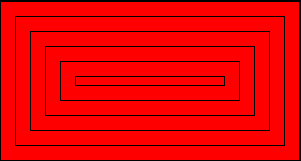

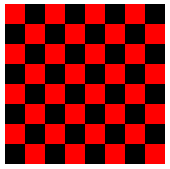

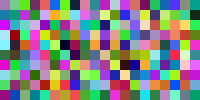

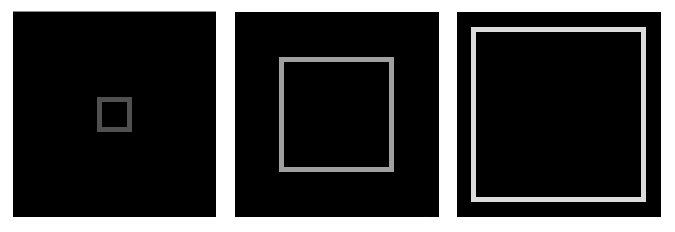

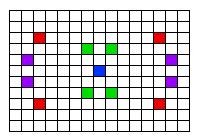

In [9]:
print("📄 --- TEXT PREVIEW ---")
print(text_content[:2000])


import pandas as pd
from IPython.display import display, HTML

if len(tables) > 0:
    print(f" Found {len(tables)} tables. Showing all below:\n")
    for idx, df in enumerate(tables):
        print(f"🔹 Table {idx+1} (Rows: {len(df)}, Columns: {len(df.columns)}):")
        display(HTML(df.to_html(index=False)))
        print("-" * 80)
else:
    print(" No tables detected.")


import os
from IPython.display import Image as IPyImage, display

image_files = sorted(os.listdir("extracted/images"))
if image_files:
    print(f"Found {len(image_files)} images. Showing first few:")
    for img_file in image_files[:5]:
        display(IPyImage(filename=os.path.join("extracted/images", img_file)))
else:
    print(" No images detected.")


Cleaning and Chunking

In [10]:
import re

def clean_text(text):
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    return text.strip()

cleaned_text = clean_text(text_content)
print("Cleaned text length:", len(cleaned_text))
print(cleaned_text[:1000])


Cleaned text length: 1909415
Introduction to Programming Using Java Version 5.0, December 2006 (Version 5.0.2, with minor corrections, November 2007) David J. Eck Hobart and William Smith Colleges ii c19962007, David J. Eck David J. Eck (eck@hws.edu) Department of Mathematics and Computer Science Hobart and William Smith Colleges Geneva, NY 14456 This book can be distributed in unmodied form with no restrictions. Modied versions can be made and distributed provided they are distributed under the same license as the original. More specically: This work is licensed under the Creative Commons Attribution-Share Alike 2.5 License. To view a copy of this license, visit http://creativecommons.org/licenses/by- sa/2.5/ or send a letter to Creative Commons, 543 Howard Street, 5th Floor, San Francisco, California, 94105, USA. The web site for this book is: http://math.hws.edu/javanotes Contents Preface xiii 1 The Mental Landscape 1 1.1 Machine Language . . . . . . . . . . . . . . . . . . . . . . 

In [11]:
def chunk_text(text, chunk_size=1000, overlap=200):
    chunks = []
    start = 0
    while start < len(text):
        end = start + chunk_size
        chunk = text[start:end]
        chunks.append(chunk)
        start += chunk_size - overlap
    return chunks

chunks = chunk_text(cleaned_text)
print(f" Created {len(chunks)} chunks.")


 Created 2387 chunks.


In [12]:
!pip install sentence-transformers faiss-cpu
from sentence_transformers import SentenceTransformer
import numpy as np, faiss

model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = np.array(model.encode(chunks, show_progress_bar=True)).astype("float32")

index = faiss.IndexFlatL2(embeddings.shape[1])
index.add(embeddings)
print("FAISS index built with", index.ntotal, "chunks.")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 20.6 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/75 [00:00<?, ?it/s]

FAISS index built with 2387 chunks.


In [13]:
!pip install sentence-transformers faiss-cpu

from sentence_transformers import SentenceTransformer
import numpy as np

# Use a free local embedding model
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

def embed_local(texts):
    return embedding_model.encode(texts, convert_to_numpy=True)

def retrieve(query, top_k=3):
    q_emb = embed_local([query]).astype('float32')
    distances, indices = index.search(q_emb, top_k)

    print("🔍 Top matches:\n")
    retrieved_chunks = []
    for i, idx in enumerate(indices[0]):
        print(f"Result {i+1}: (Distance: {distances[0][i]:.2f})")
        print(chunks[idx][:300], "...\n")
        retrieved_chunks.append(chunks[idx])
    return retrieved_chunks


In [14]:
retrieve('What is interface')

🔍 Top matches:

Result 1: (Distance: 0.82)
e other class, it can implement any number of interfaces. In fact, a class can both extend one other class and implement one or more interfaces. So, we can have things like class FilledCircle extends Circle implements Drawable, Fillable { . . . } The point of all this is that, although interfaces ar ...

Result 2: (Distance: 0.83)
an additional, technical meaning. An interface in this sense consists of a set of instance method interfaces, without any as- sociated implementations. (Actually, a Java interface can contain other things as well, but we wont discuss them here.) A class can implement an interface by providing an imp ...

Result 3: (Distance: 1.03)
wed in Java. The designers of Java wanted to keep the language reasonably simple, and felt that the benets of multiple inheritance were not worth the cost in increased complexity. However, Java does have a feature that can be used to accomplish many of the same goals as multiple inheritance

['e other class, it can implement any number of interfaces. In fact, a class can both extend one other class and implement one or more interfaces. So, we can have things like class FilledCircle extends Circle implements Drawable, Fillable { . . . } The point of all this is that, although interfaces are not classes, they are something very similar. An interface is very much like an abstract class, that is, a class that can never be used for constructing objects, but can be used as a basis for making subclasses. The subroutines in an interface are abstract methods, which must be implemented in any concrete class that implements the interface. And as with abstract classes, even though you cant construct an object from an interface, you can declare a variable whose type is given by the interface. For example, if Drawable is an interface, and if Line and FilledCircle are classes that implement Drawable, then you could say: Drawable figure; // Declare a variable of type Drawable. It can // r